In [1]:
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')


start = dt.datetime(2013, 1, 1)
end = dt.datetime(2020, 10, 1)

tickers = ['AAPL', 'AMZN', 'MSFT', 'GOOGL','FB']

stocks = web.DataReader(tickers,
                        'yahoo', start, end)['Adj Close']

stocks.head()

Symbols,AAPL,AMZN,MSFT,GOOGL,FB
Date,,,,,
2013-01-02,16.985447,257.309998,23.030146,361.987000,28.000000
2013-01-03,16.771049,258.480011,22.721630,362.197205,27.770000
2013-01-04,16.303896,259.149994,22.296381,369.354340,28.760000
2013-01-07,16.207996,268.459991,22.254692,367.742737,29.420000
2013-01-08,16.251616,266.380005,22.137955,367.017029,29.059999


Symbols,AAPL,AMZN,MSFT,GOOGL,FB,Port
Date,,,,,,
2020-10-01,6.831945,12.518985,9.141418,4.110369,9.5225,8.936467


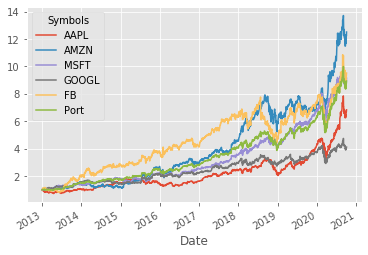

In [2]:
df = stocks.pct_change().dropna()
df['Port'] = df.mean(axis=1) # 20% apple, ... , 20% facebook
(df+1).cumprod().plot()

(df+1).cumprod()[-1:]

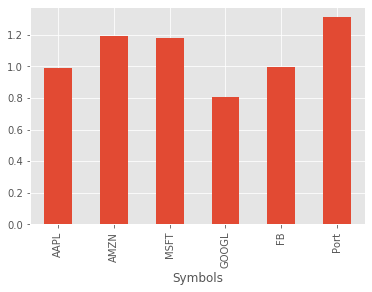

In [3]:
def sharpe_ratio(return_series, N, rf):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

N = 255 #255 trading days in a year
rf =0.01 #1% risk free rate
sharpes = df.apply(sharpe_ratio, args=(N,rf,),axis=0)

sharpes.plot.bar()

Text(0, 0.5, 'Sortino Ratio')

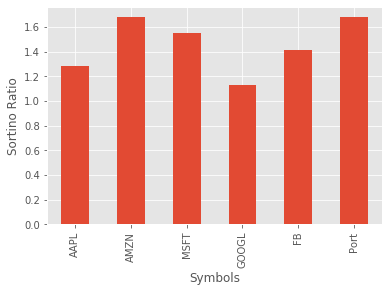

In [4]:
def sortino_ratio(series, N,rf):
    mean = series.mean() * N -rf
    std_neg = series[series<0].std()*np.sqrt(N)
    return mean/std_neg


sortinos = df.apply(sortino_ratio, args=(N,rf,), axis=0 )
sortinos.plot.bar()
plt.ylabel('Sortino Ratio')